## Product Review Analysis

1. top 10 product brand
2. total number of reviews for each brand
3. type of product
4. ranking for each product type -> based on stars
5. result of sentiment analysis

In [40]:
import pandas as pd
import re
import os

In [79]:
product_info = pd.read_csv('./passionflower_products_details.csv',index_col=0)
product_info.head(5)

,product_id,brand_id,brand_name,product_title,product_code,upc,sold_in_30_days,price,rating,review_count,url
0,72084,CGN,California Gold Nutrition,"California Gold Nutrition, EuroHerbs™, Passion...",CGN-01115,8.982200e+11,500+,$4.41,4.6,2193,https://www.iherb.com/pr/california-gold-nutri...
1,117600,SWV,Swanson,"Swanson, Full Spectrum Passion Flower, 500 mg,...",SWV-11143,8.761411e+10,500+,$2.79,4.7,743,https://www.iherb.com/pr/swanson-full-spectrum...
2,18995,SOR,Solaray,"Solaray, True Herbs, Passion Flower, 700 mg, 1...",SOR-01430,7.628001e+10,"1,000+",$11.26,4.7,4910,https://www.iherb.com/pr/solaray-true-herbs-pa...
3,18044,NOW,NOW Foods,"NOW Foods, Passion Flower, 350 mg, 90 Veg Caps...",NOW-04763,7.337390e+11,400+,$11.01,4.7,857,https://www.iherb.com/pr/now-foods-passion-flo...
4,129090,NCS,Nutricost,"Nutricost, Passion Flower Extract, 1,500 mg, 1...",NCS-67395,8.100150e+11,200+,$10.00,4.7,229,https://www.iherb.com/pr/nutricost-passion-flo...


### identify product types

In [80]:
def get_product_type(title):
    kwd_dict = {
        'Cap': 'capsule',
        'Softgel':'capsule',
        'Tablet':'tablet',
        'fl oz': 'liquid',
        'fl. oz.':'liquid',
        'Patch': 'patch',
        'Chews': 'chew',
        'Chewable':'chew',
        'Mist': 'bath&beauty',
        'Gummies':'gummy',
        'Gel':'gel',
        'Mints':'food',
        'Tea Bag' : 'food',
        'Drink': 'food'
    }

    for key, val in kwd_dict.items():
        if key.lower() in title.lower():
            return val
    return 'unknown'

product_info['product_type'] = product_info['product_title'].apply(get_product_type)

In [81]:
product_info[product_info['product_type']=='unknown']['product_title']

6      Frontier Co-op, Cut & Sifted Passion Flower He...
59     Zahler, Mantra Labs, Rest, Lemon Chamomile, 4....
71     Zesty Paws, Lil' Zesties, Calming Squares, For...
73     Abra Therapeutics, Aromasaurus Sleep, Aroma Th...
127         Organifi, Gold, Chocolate, 7.16 oz (202.9 g)
144    Organifi, Original Gold, Superfood Supplement,...
194    Bark Bistro, Relax Budder, Peanut Butter, For ...
220    NaturVet, Scoopables, Quiet Moments Calming Ai...
230    NaturVet, Scoopables Emotional Support, Daily ...
290    Boiron, SleepCalm On The Go, 2 Portable Tubes,...
Name: product_title, dtype: object

In [85]:
id_dict = {
        '30819':'raw herb',
        '142876': 'food',
        '136117':'dog food',
        '126027': 'bath&beauty',
        '126043': 'powder',
        '126042': 'powder',
        '135702': 'dog food',
        '122153': 'dog food',
        '122147': 'dog food',
        '124252': 'tablet'
    }
def update_unknown(row):

    if row['product_type'] == 'unknown' and str(row['product_id']) in id_dict:
        return id_dict[str(row['product_id'])]
    return row['product_type']


product_info['product_type'] = product_info.apply(update_unknown,axis=1)

In [86]:
product_info[product_info['product_type']=='unknown']['product_title']

Series([], Name: product_title, dtype: object)

In [107]:
product_info.to_csv('./passionflower_product_details.csv')

### Top 10 brands by number of reviews

In [151]:
product_info = pd.read_csv('./passionflower_product_details.csv',index_col=0)
product_info.head(10)

,product_id,brand_id,brand_name,product_title,product_code,upc,sold_in_30_days,price,rating,review_count,url,product_type
0,72084,CGN,California Gold Nutrition,"California Gold Nutrition, EuroHerbs™, Passion...",CGN-01115,8.982200e+11,500+,$4.41,4.6,2193,https://www.iherb.com/pr/california-gold-nutri...,capsule
1,117600,SWV,Swanson,"Swanson, Full Spectrum Passion Flower, 500 mg,...",SWV-11143,8.761411e+10,500+,$2.79,4.7,743,https://www.iherb.com/pr/swanson-full-spectrum...,capsule
2,18995,SOR,Solaray,"Solaray, True Herbs, Passion Flower, 700 mg, 1...",SOR-01430,7.628001e+10,"1,000+",$11.26,4.7,4910,https://www.iherb.com/pr/solaray-true-herbs-pa...,capsule
3,18044,NOW,NOW Foods,"NOW Foods, Passion Flower, 350 mg, 90 Veg Caps...",NOW-04763,7.337390e+11,400+,$11.01,4.7,857,https://www.iherb.com/pr/now-foods-passion-flo...,capsule
4,129090,NCS,Nutricost,"Nutricost, Passion Flower Extract, 1,500 mg, 1...",NCS-67395,8.100150e+11,200+,$10.00,4.7,229,https://www.iherb.com/pr/nutricost-passion-flo...,capsule
5,5222,NTA,Nature's Answer,"Nature's Answer, Passionflower Aerial Parts, F...",NTA-00654,8.300001e+10,400+,$12.74,4.6,1854,https://www.iherb.com/pr/nature-s-answer-passi...,liquid
6,30819,FRO,Frontier Co-op,"Frontier Co-op, Cut & Sifted Passion Flower He...",FRO-00625,8.983601e+10,100+,$12.75,4.6,337,https://www.iherb.com/pr/frontier-co-op-cut-si...,raw herb
7,110043,OWH,Oregon's Wild Harvest,"Oregon's Wild Harvest, Organic Passionflower, ...",OWH-00450,7.061950e+11,NaN,$13.10,4.7,119,https://www.iherb.com/pr/oregon-s-wild-harvest...,capsule
8,5181,NTA,Nature's Answer,"Nature's Answer, Passionflower, 500 mg, 60 Veg...",NTA-16421,8.300016e+10,100+,$11.24,4.7,775,https://www.iherb.com/pr/nature-s-answer-passi...,capsule
9,6802,TRA,Traditional Medicinals,"Traditional Medicinals, Organic Nighty Night, ...",TRA-00032,3.291700e+10,"1,000+",$6.49,4.5,5770,https://www.iherb.com/pr/traditional-medicinal...,food


In [159]:
top_10_brands = product_info.groupby('brand_name')['review_count'].sum().round(2).nlargest(10).index
top_10_brands

Index(['Yogi Tea', 'Mommy's Bliss', 'Solaray', 'Traditional Medicinals',
       'Source Naturals', 'NOW Foods', 'Natural Factors', 'VitaFusion',
       'Nature's Answer', 'Nature's Way'],
      dtype='object', name='brand_name')

In [163]:
top_10_products = product_info[product_info['brand_name'].isin(top_10_brands)]
summary = top_10_products.groupby('brand_name')['product_type'].agg(lambda x: ', '.join(x.unique())).reset_index()

summary['brand_name'] = pd.Categorical(summary['brand_name'], categories=top_10_brands, ordered=True)
summary = summary.sort_values('brand_name').reset_index(drop=True)

summary

,brand_name,product_type
0,Yogi Tea,food
1,Mommy's Bliss,"gel, liquid, tablet"
2,Solaray,capsule
3,Traditional Medicinals,food
4,Source Naturals,tablet
5,NOW Foods,"capsule, tablet, food"
6,Natural Factors,"capsule, tablet"
7,VitaFusion,gummy
8,Nature's Answer,"liquid, capsule"
9,Nature's Way,"liquid, gummy, food"


In [164]:
summary['product_type'] = summary['product_type'].str.split(', ')
summary_2 = summary.explode('product_type')[['brand_name', 'product_type']]
summary_2 = summary_2.reset_index(drop=True)

summary_2

,brand_name,product_type
0,Yogi Tea,food
1,Mommy's Bliss,gel
2,Mommy's Bliss,liquid
3,Mommy's Bliss,tablet
4,Solaray,capsule
5,Traditional Medicinals,food
6,Source Naturals,tablet
7,NOW Foods,capsule
8,NOW Foods,tablet
9,NOW Foods,food


In [165]:
avg_rating = product_info.groupby(['brand_name', 'product_type'])['rating'].mean().round(2).reset_index()
summary_3 = pd.merge(summary_2, avg_rating, on=['brand_name', 'product_type'], how='left')

summary_3


,brand_name,product_type,rating
0,Yogi Tea,food,4.57
1,Mommy's Bliss,gel,4.70
2,Mommy's Bliss,liquid,4.68
3,Mommy's Bliss,tablet,4.80
4,Solaray,capsule,4.66
5,Traditional Medicinals,food,4.67
6,Source Naturals,tablet,4.60
7,NOW Foods,capsule,4.55
8,NOW Foods,tablet,3.90
9,NOW Foods,food,4.50


In [167]:
sentiment_df = pd.read_csv('./passionflower_reviews_with_sentiment.csv',index_col=0)
sentiment_df


,product_id,brand_id,brand_name,product_title,price,rating,review_count,url,date_posted,review_title,review_text,text,vader_sentiment,bert_sentiment,product_type
0,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-10-13,NaN,I bought this medicine after reading reviews.,I bought this medicine after reading reviews.,pos,neg,tablet
1,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-20,The capsule is relatively large,The capsules are relatively large and contain ...,The capsule is relatively large The capsules a...,pos,pos,tablet
2,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-18,great,I think it helps..before going to bed,great I think it helps..before going to bed,pos,pos,tablet
3,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-14,NaN,"The best remedy for stress, you can take it in...","The best remedy for stress, you can take it i...",pos,pos,tablet
4,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-25,NaN,"It really helps. The composition is natural, h...","It really helps. The composition is natural, ...",pos,pos,tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132389,145387,JYS,JoySpring,"JoySpring, Calmify, Liquid Magnesium, 1 fl oz ...",$24.99,4.7,272,https://www.iherb.com/pr/joyspring-calmify-liq...,2021-09-27,NaN,"Good preparation, suitable for children","Good preparation, suitable for children",pos,pos,liquid
132390,145387,JYS,JoySpring,"JoySpring, Calmify, Liquid Magnesium, 1 fl oz ...",$24.99,4.7,272,https://www.iherb.com/pr/joyspring-calmify-liq...,2021-09-27,NaN,Works well,Works well,pos,pos,liquid
132391,145387,JYS,JoySpring,"JoySpring, Calmify, Liquid Magnesium, 1 fl oz ...",$24.99,4.7,272,https://www.iherb.com/pr/joyspring-calmify-liq...,2021-09-20,NaN,My daughter has anxiety with ADHD and I tried ...,My daughter has anxiety with ADHD and I tried...,pos,pos,liquid
132392,145387,JYS,JoySpring,"JoySpring, Calmify, Liquid Magnesium, 1 fl oz ...",$24.99,4.7,272,https://www.iherb.com/pr/joyspring-calmify-liq...,2021-09-15,NaN,I really enjoy this product! I know its geared...,I really enjoy this product! I know its geare...,pos,pos,liquid


In [170]:
df = sentiment_df[sentiment_df['brand_name'].isin(top_10_brands)]
df.head(10)

,product_id,brand_id,brand_name,product_title,price,rating,review_count,url,date_posted,review_title,review_text,text,vader_sentiment,bert_sentiment,product_type
0,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-10-13,NaN,I bought this medicine after reading reviews.,I bought this medicine after reading reviews.,pos,neg,tablet
1,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-20,The capsule is relatively large,The capsules are relatively large and contain ...,The capsule is relatively large The capsules a...,pos,pos,tablet
2,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-18,great,I think it helps..before going to bed,great I think it helps..before going to bed,pos,pos,tablet
3,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-09-14,NaN,"The best remedy for stress, you can take it in...","The best remedy for stress, you can take it i...",pos,pos,tablet
4,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-25,NaN,"It really helps. The composition is natural, h...","It really helps. The composition is natural, ...",pos,pos,tablet
5,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-19,This is a really good product for stress relief.,I have seen the effects of taking this product...,This is a really good product for stress relie...,pos,pos,tablet
6,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-13,Taken due to stress,"I took it because I'm sensitive to stress, but...",Taken due to stress I took it because I'm sens...,neg,pos,tablet
7,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-08-01,NaN,"It is a very good product, I highly recommend ...","It is a very good product, I highly recommend...",pos,pos,tablet
8,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-07-16,super complex,Stress Complex (Hi-Stress B and C) is an effec...,super complex Stress Complex (Hi-Stress B and ...,pos,pos,tablet
9,1236,SNS,Source Naturals,"Source Naturals, Hi-Stress B&C With Herbs, 120...",$15.41,4.6,247,https://www.iherb.com/pr/source-naturals-hi-st...,2024-07-10,Excellent!,The supplement fights stress very well. I use ...,Excellent! The supplement fights stress very w...,pos,pos,tablet


In [172]:
df = df.groupby(['brand_name','product_type','bert_sentiment']).size().unstack(fill_value=0).rename_axis(None,axis=1).reset_index()
df

,brand_name,product_type,neg,pos
0,Mommy's Bliss,gel,100,1024
1,Mommy's Bliss,liquid,1066,9386
2,Mommy's Bliss,tablet,376,5134
3,NOW Foods,capsule,560,2888
4,NOW Foods,food,10,58
5,NOW Foods,tablet,58,110
6,Natural Factors,capsule,715,2993
7,Natural Factors,tablet,1,5
8,Nature's Answer,capsule,101,1035
9,Nature's Answer,liquid,247,1913


In [174]:
df.rename(columns={'neg': 'negative_count', 'pos': 'positive_count'}, inplace=True)

df['total_reviews'] = df['positive_count'] + df['negative_count']
df['positive_ratio'] = df['positive_count'] / df['total_reviews']
df['negative_ratio'] = df['negative_count'] / df['total_reviews']

df

,brand_name,product_type,negative_count,positive_count,total_reviews,positive_ratio,negative_ratio
0,Mommy's Bliss,gel,100,1024,1124,0.911032,0.088968
1,Mommy's Bliss,liquid,1066,9386,10452,0.898010,0.101990
2,Mommy's Bliss,tablet,376,5134,5510,0.931760,0.068240
3,NOW Foods,capsule,560,2888,3448,0.837587,0.162413
4,NOW Foods,food,10,58,68,0.852941,0.147059
5,NOW Foods,tablet,58,110,168,0.654762,0.345238
6,Natural Factors,capsule,715,2993,3708,0.807174,0.192826
7,Natural Factors,tablet,1,5,6,0.833333,0.166667
8,Nature's Answer,capsule,101,1035,1136,0.911092,0.088908
9,Nature's Answer,liquid,247,1913,2160,0.885648,0.114352


In [175]:
df_2 = pd.merge(df,summary_3,on=['brand_name', 'product_type'], how='right')
df_2

,brand_name,product_type,negative_count,positive_count,total_reviews,positive_ratio,negative_ratio,rating
0,Yogi Tea,food,3972,38004,41976,0.905374,0.094626,4.57
1,Mommy's Bliss,gel,100,1024,1124,0.911032,0.088968,4.70
2,Mommy's Bliss,liquid,1066,9386,10452,0.898010,0.101990,4.68
3,Mommy's Bliss,tablet,376,5134,5510,0.931760,0.068240,4.80
4,Solaray,capsule,1454,10209,11663,0.875332,0.124668,4.66
5,Traditional Medicinals,food,650,5753,6403,0.898485,0.101515,4.67
6,Source Naturals,tablet,699,3814,4513,0.845114,0.154886,4.60
7,NOW Foods,capsule,560,2888,3448,0.837587,0.162413,4.55
8,NOW Foods,tablet,58,110,168,0.654762,0.345238,3.90
9,NOW Foods,food,10,58,68,0.852941,0.147059,4.50


In [176]:
df_2.to_csv('./product_summary_table.csv')

## Visualization

In [37]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
df = pd.read_csv('./product_summary_table.csv',index_col=0)
df

,brand_name,product_type,negative_count,positive_count,total_reviews,positive_ratio,negative_ratio,rating
0,Yogi Tea,food,3972,38004,41976,0.905374,0.094626,4.57
1,Mommy's Bliss,gel,100,1024,1124,0.911032,0.088968,4.70
2,Mommy's Bliss,liquid,1066,9386,10452,0.898010,0.101990,4.68
3,Mommy's Bliss,tablet,376,5134,5510,0.931760,0.068240,4.80
4,Solaray,capsule,1454,10209,11663,0.875332,0.124668,4.66
5,Traditional Medicinals,food,650,5753,6403,0.898485,0.101515,4.67
6,Source Naturals,tablet,699,3814,4513,0.845114,0.154886,4.60
7,NOW Foods,capsule,560,2888,3448,0.837587,0.162413,4.55
8,NOW Foods,tablet,58,110,168,0.654762,0.345238,3.90
9,NOW Foods,food,10,58,68,0.852941,0.147059,4.50


In [54]:
brands = df['brand_name'].unique().tolist()
types = df['product_type'].unique().tolist()


In [55]:
color_dict = {
    'food': '#636EFA',
    'gel': '#EF553B',
    'liquid':'#00CC96',
    'tablet':'#AB63FA',
    'capsule':'#FFA15A',
    'gummy':'#19D3F3'
}

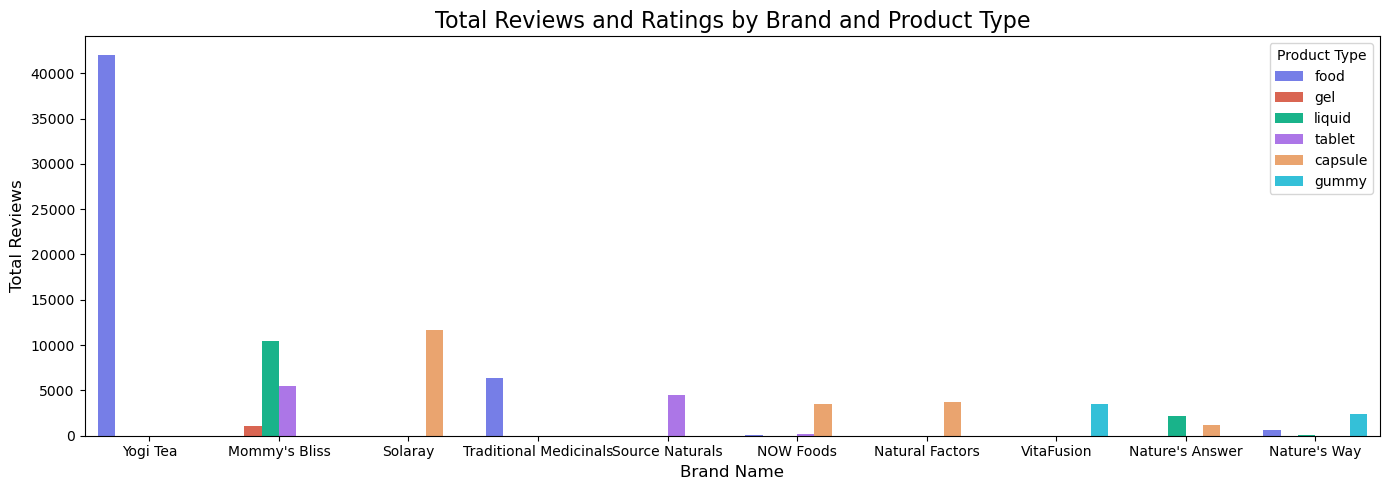

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# 设置图形大小
fig, ax = plt.subplots(figsize=(14, 5))

# 绘制柱状图
barplot = sns.barplot(
    data=df,
    x="brand_name",
    y="total_reviews",
    hue="product_type",
    palette=color_dict,
    dodge=True,
    ax=ax
)


# 图例调整
ax.legend(title="Product Type", loc='upper right')

# 设置标签和标题
ax.set_ylabel("Total Reviews", fontsize=12)
ax.set_xlabel("Brand Name", fontsize=12)
ax.set_title("Total Reviews and Ratings by Brand and Product Type", fontsize=16)

# 美化布局
plt.tight_layout()

# 显示图表
plt.show()

In [86]:
df_melted = df.melt(id_vars=['brand_name', 'product_type'], 
                    value_vars=['positive_count', 'negative_count'],
                    var_name='review_type', value_name='review_count')

In [87]:
df_melted

,brand_name,product_type,review_type,review_count
0,Yogi Tea,food,positive_count,38004
1,Mommy's Bliss,gel,positive_count,1024
2,Mommy's Bliss,liquid,positive_count,9386
3,Mommy's Bliss,tablet,positive_count,5134
4,Solaray,capsule,positive_count,10209
5,Traditional Medicinals,food,positive_count,5753
6,Source Naturals,tablet,positive_count,3814
7,NOW Foods,capsule,positive_count,2888
8,NOW Foods,tablet,positive_count,110
9,NOW Foods,food,positive_count,58


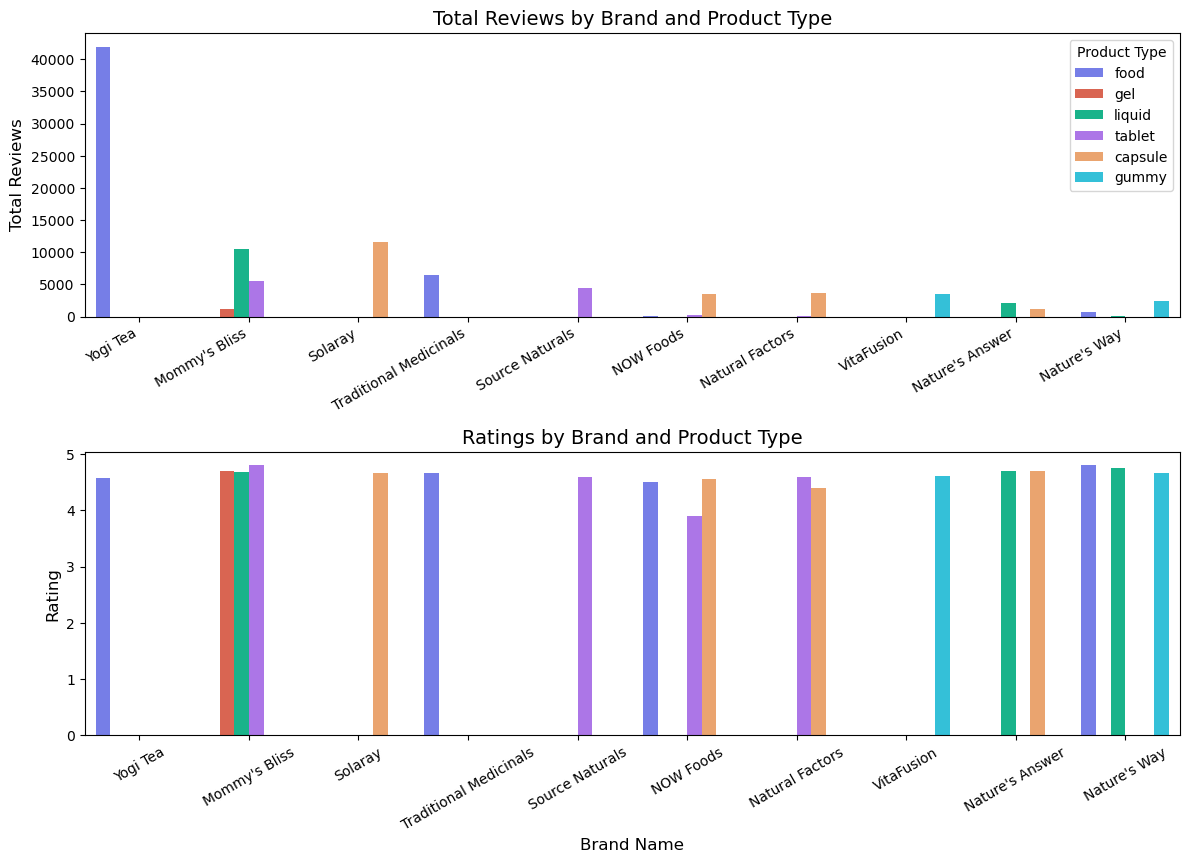

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec


fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,8))


sns.barplot(
    data=df,
    x="brand_name",
    y="total_reviews",
    hue="product_type",
    palette=color_dict,
    dodge=True,
    width=0.8,
    ax=ax1
)
ax1.set_ylabel("Total Reviews", fontsize=12)
ax1.set_title("Total Reviews by Brand and Product Type", fontsize=14)
ax1.legend(title="Product Type", loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right') 
ax1.set_xlabel("")

sns.barplot(
    data=df,
    x="brand_name",
    y="rating",
    hue="product_type",
    palette=color_dict,
    dodge=True,
    width=0.8,
    ax=ax2
)
ax2.set_ylabel("Rating", fontsize=12)
ax2.set_xlabel("Brand Name", fontsize=12)
ax2.set_title("Ratings by Brand and Product Type", fontsize=14)
ax2.get_legend().set_visible(False)

# 调整布局，使得图形不重叠
plt.tight_layout()
plt.xticks(rotation=30)

# 显示图表
plt.show()

In [273]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel


df = pd.read_csv("passionflower_reviews_with_sentiment.csv",index_col=0)
b = "Yogi Tea"
sub_df = df[df['brand_name']==b]
pos_df = sub_df[sub_df['bert_sentiment']=='pos']
neg_df = sub_df[sub_df['bert_sentiment']=='neg']

pos_corpus = pos_df['text'].to_list()
neg_corpus = neg_df['text'].to_list()

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

def get_topics(df,corpus,n_topics):
    clean_corpus = [clean(doc).split() for doc in corpus]
    dictionary = corpora.Dictionary(clean_corpus)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]
    lda = LdaModel(doc_term_matrix, num_topics=n_topics, id2word = dictionary)

    dominant_topics = []
    for doc_bow in doc_term_matrix:
        topic_probs = lda.get_document_topics(doc_bow)
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]  # 找到最大概率的主题
        dominant_topics.append(dominant_topic)

    df['topic_label'] = dominant_topics

    return df, lda
    #return lda.print_topics(num_topics=3, num_words=5)


pos_df,pos_lda = get_topics(pos_df,pos_corpus,n_topics=5)
neg_df,neg_lda = get_topics(neg_df,neg_corpus,n_topics=5)

print(pos_lda.print_topics(num_words=2))
print(neg_lda.print_topics(num_words=2))


/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_1204/571027108.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[(0, '0.068*"good" + 0.044*"happy"'), (1, '0.110*"tea" + 0.036*"new"'), (2, '0.062*"drink" + 0.032*"scent"'), (3, '0.126*"excellent" + 0.110*"quality"'), (4, '0.070*"tea" + 0.040*"stress"')]
[(0, '0.033*"taste" + 0.027*"tea"'), (1, '0.076*"taste" + 0.049*"like"'), (2, '0.073*"taste" + 0.051*"like"'), (3, '0.049*"like" + 0.038*"taste"'), (4, '0.048*"tea" + 0.045*"taste"')]


/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_1204/571027108.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [265]:
topic_labels = {
    0: "Taste"
}

def add_topic_labels(df, topic_labels):
    df['topic'] = df['topic_label'].map(topic_labels)
    return df
pos_df = add_topic_labels(pos_df, topic_labels)

topic_labels = {
    0:'Taste'
}
neg_df = add_topic_labels(neg_df, topic_labels)




/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_1204/1007713688.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_1204/1007713688.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [266]:
df_final = pd.concat([pos_df, neg_df], ignore_index=True)

In [268]:
df_final[['brand_name','bert_sentiment','topic']]

,brand_name,bert_sentiment,topic
0,Nature's Way,pos,Taste
1,Nature's Way,pos,Taste
2,Nature's Way,pos,Taste
3,Nature's Way,pos,Taste
4,Nature's Way,pos,Taste
...,...,...,...
3099,Nature's Way,neg,Taste
3100,Nature's Way,neg,Taste
3101,Nature's Way,neg,Taste
3102,Nature's Way,neg,Taste


In [1]:
import pandas as pd

df = pd.read_csv('./product_summary_table.csv',index_col=0)
df

,brand_name,product_type,negative_count,positive_count,total_reviews,positive_ratio,negative_ratio,rating
0,Yogi Tea,food,3972,38004,41976,0.905374,0.094626,4.57
1,Mommy's Bliss,gel,100,1024,1124,0.911032,0.088968,4.70
2,Mommy's Bliss,liquid,1066,9386,10452,0.898010,0.101990,4.68
3,Mommy's Bliss,tablet,376,5134,5510,0.931760,0.068240,4.80
4,Solaray,capsule,1454,10209,11663,0.875332,0.124668,4.66
5,Traditional Medicinals,food,650,5753,6403,0.898485,0.101515,4.67
6,Source Naturals,tablet,699,3814,4513,0.845114,0.154886,4.60
7,NOW Foods,capsule,560,2888,3448,0.837587,0.162413,4.55
8,NOW Foods,tablet,58,110,168,0.654762,0.345238,3.90
9,NOW Foods,food,10,58,68,0.852941,0.147059,4.50


In [2]:
brands = df['brand_name'].unique().tolist()
brands

['Yogi Tea',
 "Mommy's Bliss",
 'Solaray',
 'Traditional Medicinals',
 'Source Naturals',
 'NOW Foods',
 'Natural Factors',
 'VitaFusion',
 "Nature's Answer",
 "Nature's Way"]

In [3]:
marks = df.groupby('brand_name').sum('total_reviews')['total_reviews'].nlargest(10).values
names = df.groupby('brand_name').sum('total_reviews')['total_reviews'].nlargest(10).index
names

Index(['Yogi Tea', 'Mommy's Bliss', 'Solaray', 'Traditional Medicinals',
       'Source Naturals', 'Natural Factors', 'NOW Foods', 'VitaFusion',
       'Nature's Answer', 'Nature's Way'],
      dtype='object', name='brand_name')

In [12]:
color_dict = {
    'food': '#636EFA',
    'gel': '#EF553B',
    'liquid':'#00CC96',
    'tablet':'#AB63FA',
    'capsule':'#FFA15A',
    'gummy':'#19D3F3'
}

In [14]:
color_dict.values()

dict_values(['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3'])

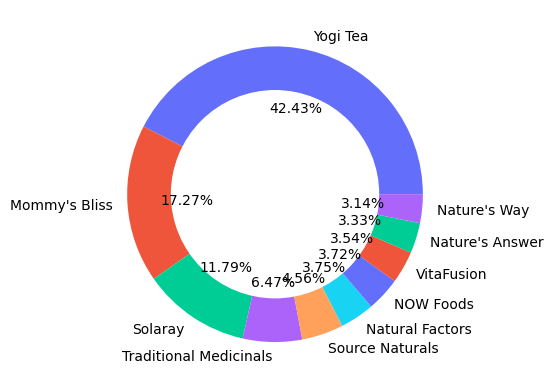

In [17]:
import matplotlib.pyplot as plt
my_circle = plt.Circle((0,0),0.70,color = 'white')
plt.pie(marks,labels = names,autopct = '%1.2f%%',colors = color_dict.values())
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


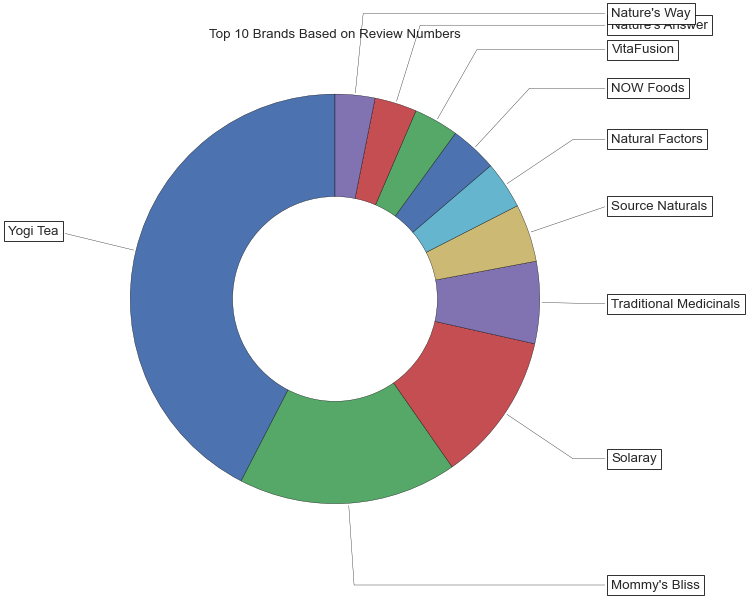

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw=dict(aspect="equal"))

wedges,texts = ax.pie(marks, wedgeprops=dict(width=0.5),startangle=90)

bbox_props = dict(boxstyle='square,pad=0.3',fc='w',ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle='-'),bbox = bbox_props,zorder=0, va = 'center')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(names[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
ax.set_title('Top 10 Brands Based on Review Numbers')
plt.show()

In [12]:
brands = df['brand_name'].unique().tolist()
types = df['product_type'].unique().tolist()

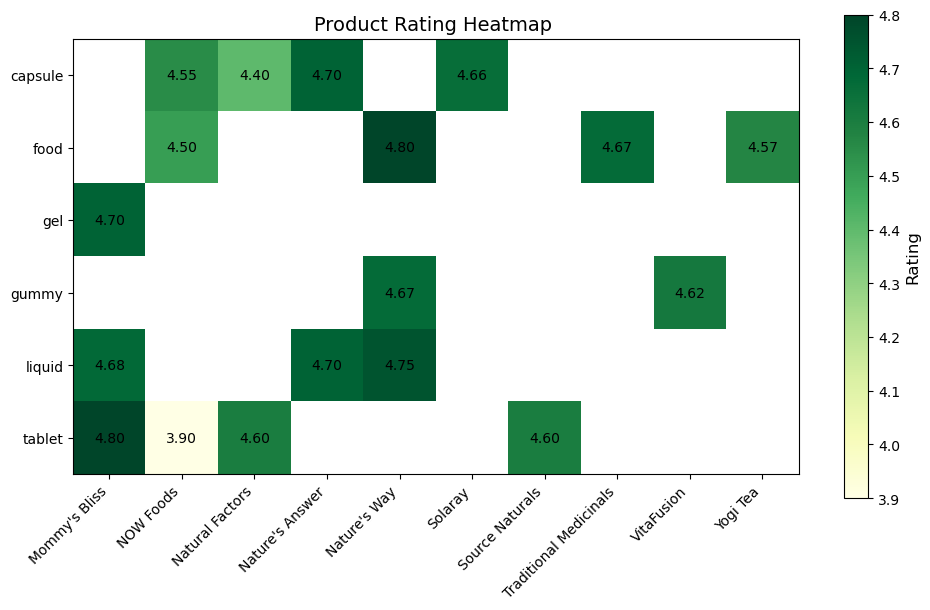

In [94]:
import matplotlib.pyplot as plt
import numpy as np

pivot_table = df.pivot(columns="brand_name", index="product_type", values="rating")
data = pivot_table.to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))

cmap = plt.cm.YlGn 
im = ax.imshow(data,cmap = cmap)

cbar = plt.colorbar(im)
cbar.set_label("Rating", fontsize=12)

ax.set_xticks(np.arange(pivot_table.shape[1]))  
ax.set_yticks(np.arange(pivot_table.shape[0]))  
ax.set_xticklabels(pivot_table.columns, rotation=45, ha="right") 
ax.set_yticklabels(pivot_table.index)  


ax.set_title("Product Rating Heatmap ", fontsize=14)

for i in range(len(types)):
    for j in range(len(brands)):
        value = data[i, j]
        if not np.isnan(value):  # Only annotate non-zero values
            ax.text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
from PIL import Image

df = pd.read_csv('./product_summary_table.csv',index_col=0)
names = df['brand_name'].unique().tolist()
types = df['product_type'].unique().tolist()



/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_94968/1396850126.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['product_type'] = pd.Categorical(sub_df['product_type'], categories=types, ordered=True)
/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_94968/1396850126.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['product_type'] = pd.Categorical(sub_df['product_type'], categories=types, ordered=True)
/var/folders/tj/jvhkykbx6fz7dk9_z8y5wz4r0000gn/T/ipykernel_949

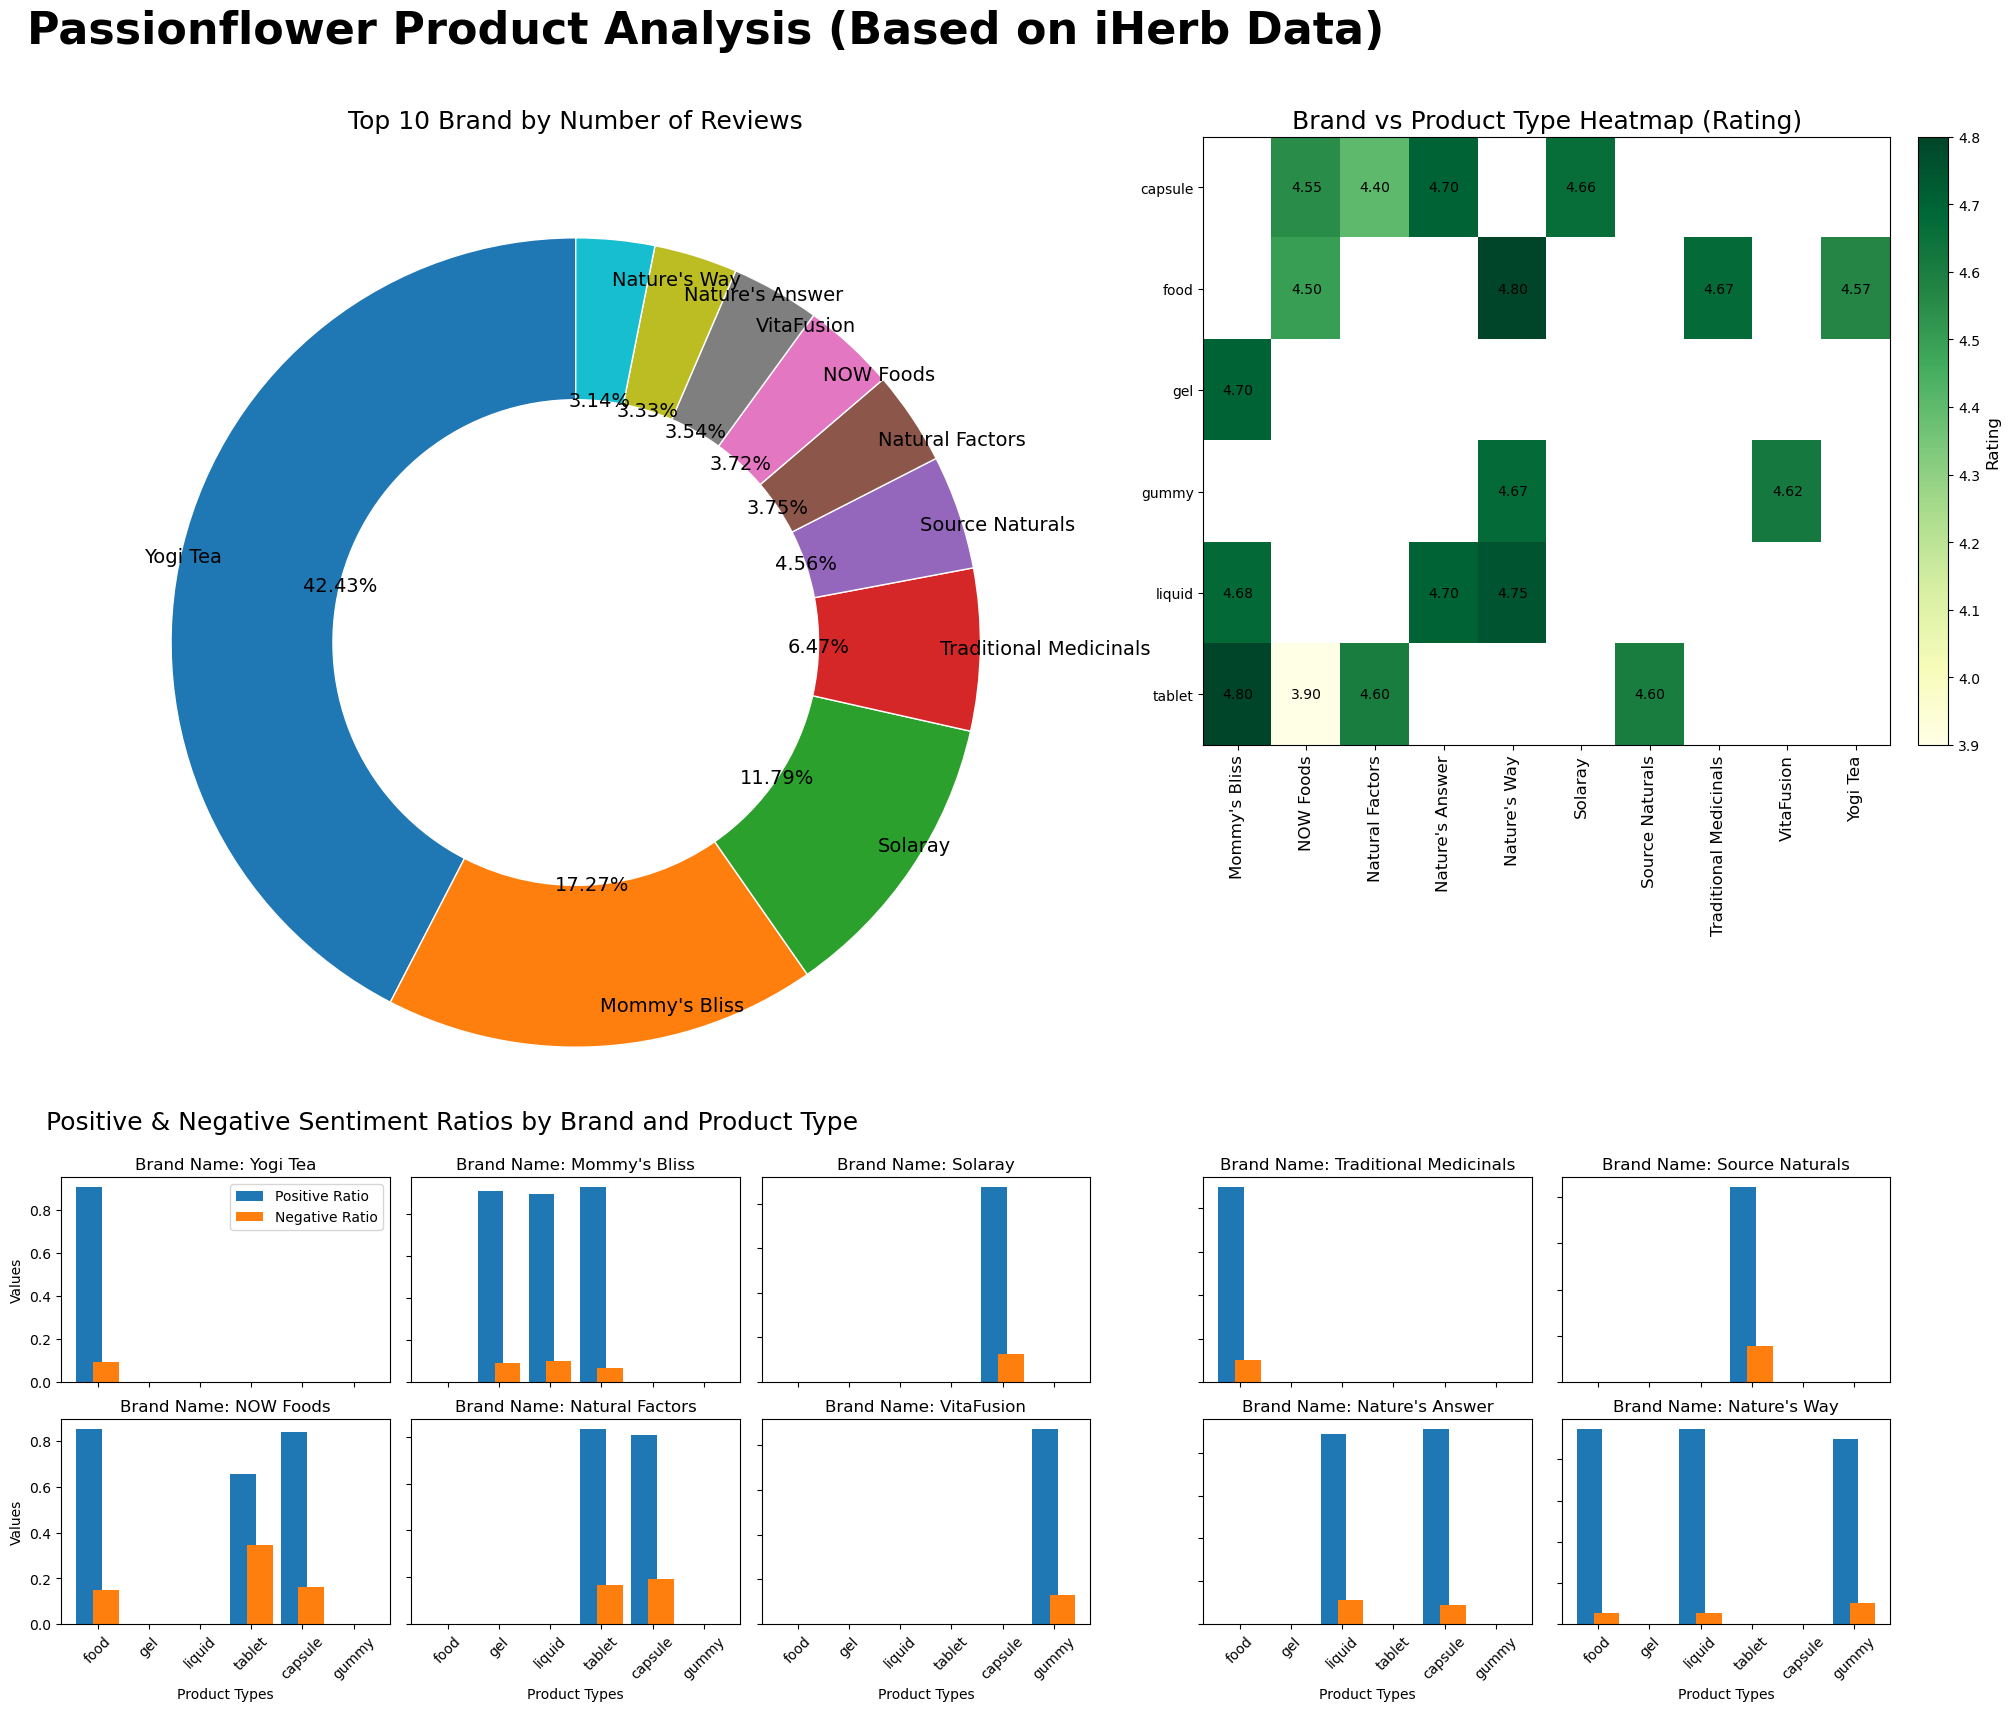

In [249]:
fig = plt.figure(figsize=(20,16),constrained_layout=True)
gs = fig.add_gridspec(5,5)


# donut plot
ax1 = fig.add_subplot(gs[:3,:3])
ax1_values = df.groupby('brand_name').sum('total_reviews')['total_reviews'].nlargest(10).values
ax1_marks = df.groupby('brand_name').sum('total_reviews')['total_reviews'].nlargest(10).index

ax1.pie(ax1_values,labels = ax1_marks,autopct='%1.2f%%',wedgeprops=dict(width=0.4, edgecolor='w'),startangle=90,textprops={'fontsize': 14},labeldistance=0.9)
ax1.set_title("Top 10 Brand by Number of Reviews",fontsize = 18)

# heatmap
ax2 = fig.add_subplot(gs[0:2,3:5])

pivot_table = df.pivot(columns="brand_name", index="product_type", values="rating")
ax2_data = pivot_table.to_numpy()
img2 = ax2.imshow(ax2_data,cmap=plt.cm.YlGn,aspect='auto')


for i in range(len(types)):
    for j in range(len(brands)):
        value = data[i, j]
        if not np.isnan(value):  # Only annotate non-zero values
            ax2.text(j, i, f"{value:.2f}", ha="center", va="center", color="black", fontsize=10)

cbar = fig.colorbar(img2, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label("Rating", fontsize=12)

ax2.set_xticks(np.arange(pivot_table.shape[1]))  
ax2.set_yticks(np.arange(pivot_table.shape[0]))  
ax2.set_xticklabels(pivot_table.columns,rotation=90,fontsize=12)
ax2.set_yticklabels(pivot_table.index)
ax2.set_title('Brand vs Product Type Heatmap (Rating)',fontsize = 18)

# grouped bar charts
df_2 = df.pivot_table(index='brand_name',columns = 'product_type',values = 'positive_ratio',fill_value=0)
df_2 = df_2.unstack().reset_index(name='positive_ratio')
df_2['negative_ratio'] = np.where(df_2['positive_ratio'] == 0, 0, 1 - df_2['positive_ratio'])

width = .5
x_values = np.arange(len(types))

k = 0
for i in range(3,5):
    for j in range(0,5):

        axes = fig.add_subplot(gs[i,j])

        sub_df = df_2[df_2['brand_name']==brands[k]]
        sub_df['product_type'] = pd.Categorical(sub_df['product_type'], categories=types, ordered=True)
        sub_df = sub_df.sort_values('product_type') 

        axes.bar(x=x_values-(1/6),height = sub_df['positive_ratio'],width = width,label = 'Positive Ratio')
        axes.bar(x=x_values+(1/6),height = sub_df['negative_ratio'],width = width,label = 'Negative Ratio')

        
        axes.set_xticks(x_values)
        axes.set_xticklabels(types,rotation = 45)
        axes.set_xlabel('Product Types')
        axes.set_ylabel('Values')
        if i == 3:
            axes.set_xticklabels([])
            axes.set_xlabel('')
            #plt.setp(axes.get_xticklabels(), visible=False)
            
        if j != 0:
            axes.set_yticklabels([])  
            axes.set_ylabel('')
            #plt.setp(axes.get_ylabel(),visible = False)


        axes.set_title(f'Brand Name: {brands[k]}')

        if k == 0:
            plt.legend()
        k = k + 1
   

fig.suptitle('Passionflower Product Analysis (Based on iHerb Data)',fontsize = 32,fontweight="bold",y = 1.06,x=0.35)
fig.text(x = 0.02,y = 0.36,s =  'Positive & Negative Sentiment Ratios by Brand and Product Type',fontsize = 18)

plt.show()